# Introduction to Exploritary Data Analysis
Analyzing a dataset typically involves several key steps :
1. [Step 0: Imports and Reading data](#1)
2. [Step 1: data Understanding](#2)
3. [Step 2: data Prep](#3)
4. [Step 3: Feature Understanding](#4)
5. [Step 4: Feature Relationships](#5)
6. [Step 5: Analyse Hypothese](#6)
7. [Step 6: data Cleaning](#7)
8. [Step 7: Model Building (If Applicable):](#8)
9. [Step 8: Model Evaluation:](#9)
10. [Step 9: Feature Engineering:](#10)
11. [Step 10: Feature Scalling:](#11)


# [Step 0: Imports and Reading data]()<a id="1"></a> <br>

In [450]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import scipy.stats as sc
import statistics as st
pd.set_option('display.max_row',111)
pd.set_option('display.max_column',111)
# plt.style.use('dark_background')
plt.style.use('ggplot')

df = pd.read_csv('D:/Paractical data scientist/player-salary/nba2k20-full.csv')
df = df.copy()

# [Step 1: data Understanding]()<a id="2"></a> <br>
- Analysis the shape : We'll just focus on the form of data : Ndr of rows & columns : (150, 5)

In [451]:
df.head(5)

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State


In [452]:
df.drop_duplicates(inplace = True)

In [453]:
df.shape

(429, 14)

In [454]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    429 non-null    object
 1   rating       429 non-null    int64 
 2   jersey       429 non-null    object
 3   team         406 non-null    object
 4   position     429 non-null    object
 5   b_day        429 non-null    object
 6   height       429 non-null    object
 7   weight       429 non-null    object
 8   salary       429 non-null    object
 9   country      429 non-null    object
 10  draft_year   429 non-null    int64 
 11  draft_round  429 non-null    object
 12  draft_peak   429 non-null    object
 13  college      363 non-null    object
dtypes: int64(2), object(12)
memory usage: 47.0+ KB


<Axes: ylabel='proportion'>

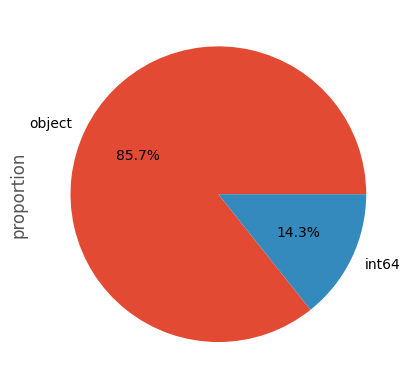

In [455]:
plt.figure()
df.dtypes.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

# [Step 2: data Preperation]()<a id="3"></a> <br>

- Dropping irrelevant columns and rows

In [456]:
for col in df.select_dtypes('object'):
    if len(df[col].unique()) == 1 :
        print("we drop "+col+" : Observing Unique Values")
        df.drop([col], axis=1, inplace=True)

In [457]:
df = df.drop(['full_name', 'b_day', 'college'], axis = 1)
df.head()

,rating,jersey,team,position,height,weight,salary,country,draft_year,draft_round,draft_peak
0,97,#23,Los Angeles Lakers,F,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1
1,97,#2,Los Angeles Clippers,F,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15
2,96,#34,Milwaukee Bucks,F-G,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15
3,96,#7,Brooklyn Nets,F,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2
4,96,#13,Houston Rockets,G,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3


- - Cleaning Column (not always use it)

In [458]:
def removehash(value):
    value = value[1:]
    return int(value)
df['jersey'] = df['jersey'].apply(removehash)

In [459]:
df['height']=df['height'].apply(lambda x: float(x.split('/')[1]) if len(x)>2 else float(x))
df['height'].head()

0    2.06
1    2.01
2    2.11
3    2.08
4    1.96
Name: height, dtype: float64

In [460]:
df['weight']=df['weight'].apply(lambda x: (x.split('/')[1]) if len(x)>2 else x)
df['weight']=df['weight'].apply(lambda x: float(x.split('kg')[0]) if len(x)>2 else float(x))
df['weight'].head()

0    113.4
1    102.1
2    109.8
3    104.3
4     99.8
Name: weight, dtype: float64

In [461]:
def removehash(value):
    value = value[1:]
    return int(value)
df['salary'] = df['salary'].apply(removehash)

In [462]:
def removecountryoutlier(value):
    if value not in ['USA', 'Canada', 'Australia',"France"]:
        return 'Others'
    else:
        return value
df['country'] = df['country'].apply(removecountryoutlier)
df['country'].value_counts()

country
USA          323
Others        74
Canada        15
Australia      9
France         8
Name: count, dtype: int64

In [463]:
df['draft_round']=df['draft_round'].apply(lambda x: str(0) if x=='Undrafted' else str(x))

In [464]:
df['draft_peak']=df['draft_peak'].apply(lambda x: str(0) if x=='Undrafted' else str(x))

- 
    - Analyse val 0 : ( % of null(emptying) for each column with sum in axis 0 )

<Axes: >

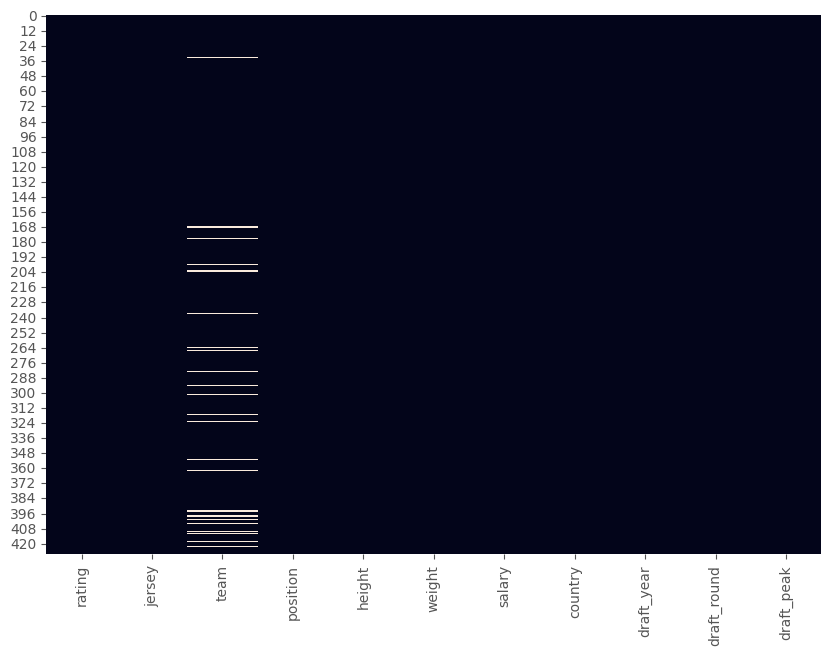

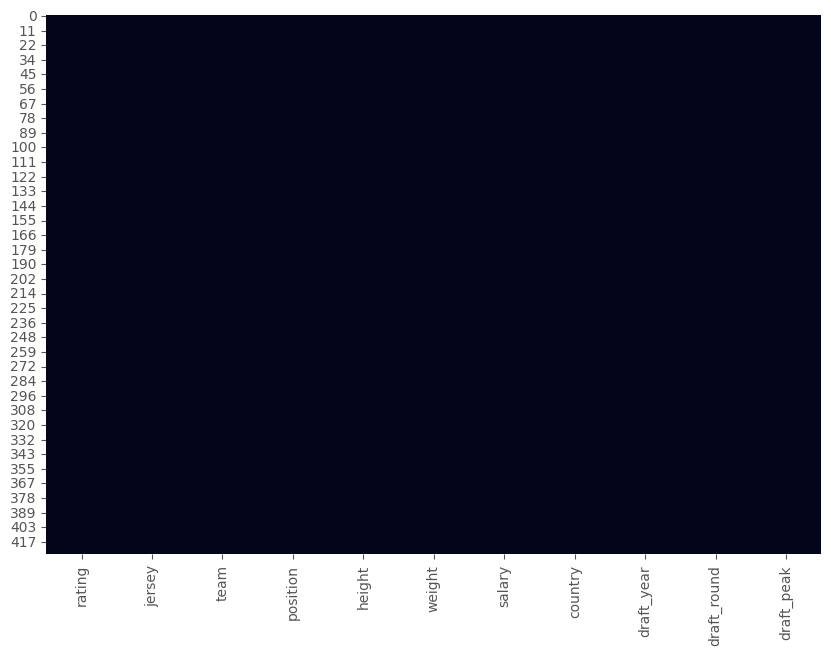

In [465]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isna(), cbar=False) 
df = df.dropna()
plt.figure(figsize=(10,7))
sns.heatmap(df.isna(), cbar=False) 

# [Step 3: Feature Understanding]()<a id="4"></a> <br>

- - Analyse target : (reg or classif) / (variables type:'numerical' or 'categorical') / (equilibre or not) classif non equilibre 10% of var1

Text(0.5, 0, 'salary')

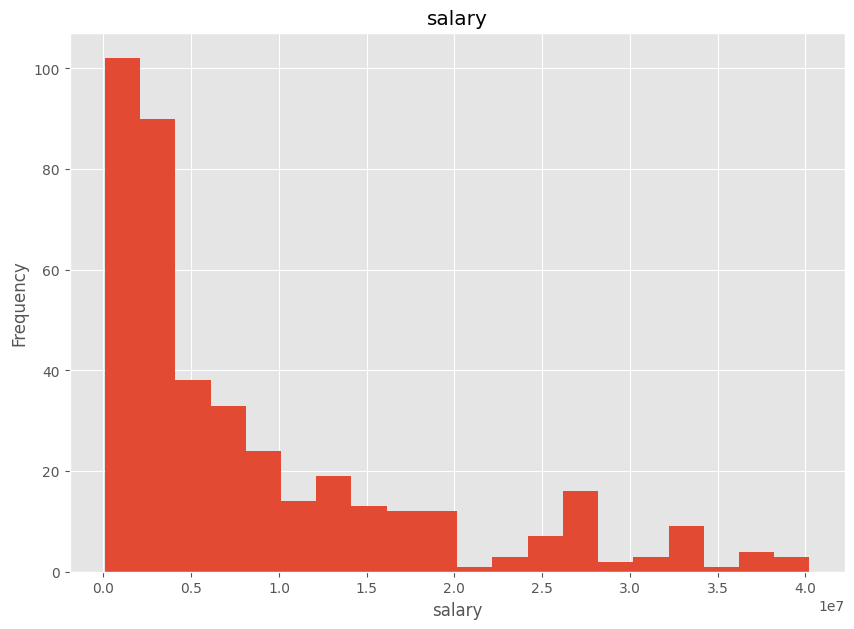

In [466]:
plt.figure(figsize=(10,7))
ax = df['salary'].plot(kind='hist',bins=20,title='salary')
ax.set_xlabel('salary')

- - Histo des variables columns number : (distibution normale ou gausien symetrique or not) / uniforme / multi modale

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

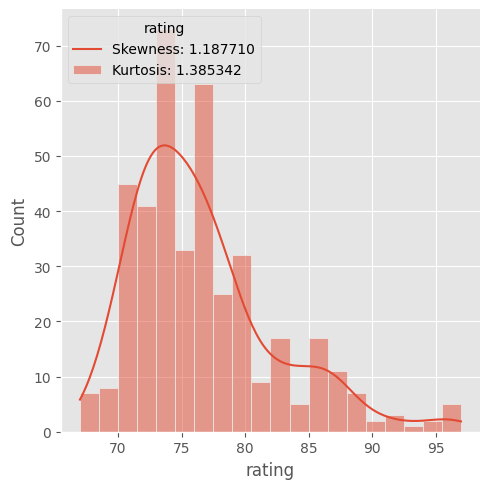

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

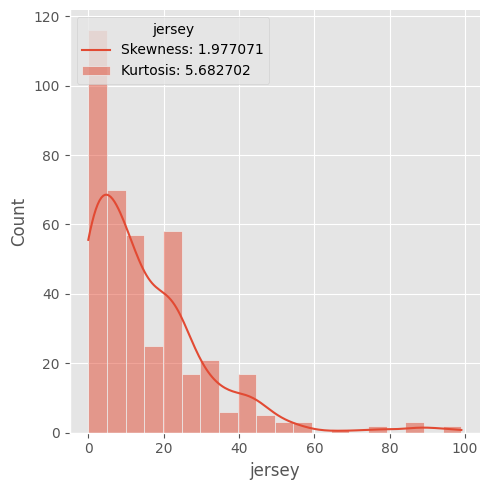

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

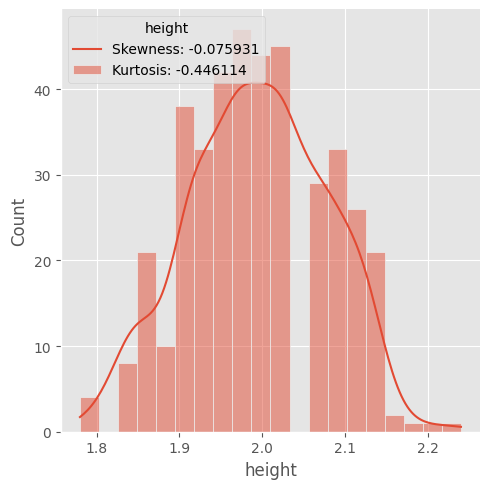

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

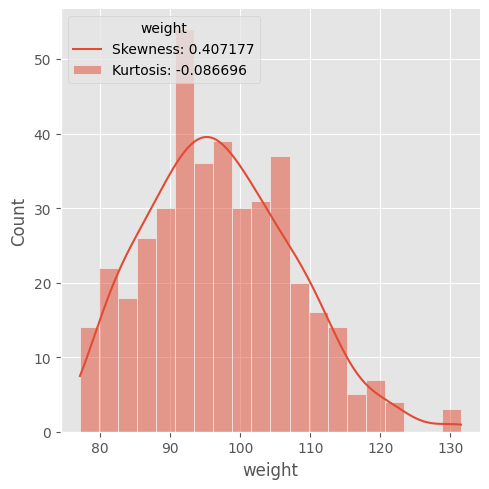

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

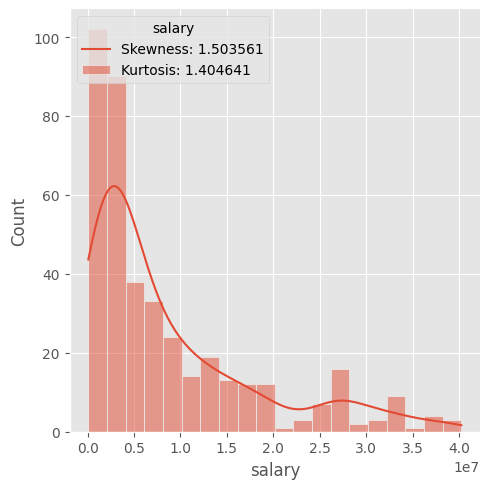

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

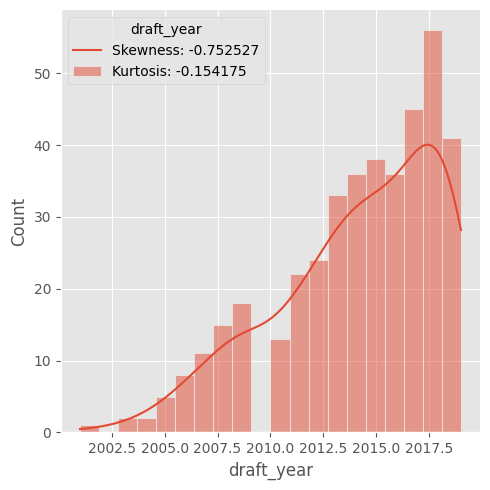

In [467]:
for col in df.select_dtypes(include=['int','float']):
    plt.figure(figsize=(6,5))
    ax = sns.displot(df, x=col,kde=True ,bins=20)
    plt.legend(title=col, loc='upper left', labels=["Skewness: %f" % df[col].skew(),"Kurtosis: %f" % df[col].kurt()])
    plt.show(ax)

- - Histo des variables columns object : (binaire(0,1) or not) / (equilibre or not)

C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_20300\2772840942.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(df[col],palette='deep')


team---------------------------------------------- ['Los Angeles Lakers' 'Los Angeles Clippers' 'Milwaukee Bucks'
 'Brooklyn Nets' 'Houston Rockets' 'Golden State Warriors'
 'Portland Trail Blazers' 'Philadelphia 76ers' 'Denver Nuggets'
 'Minnesota Timberwolves' 'Miami Heat' 'Utah Jazz' 'Detroit Pistons'
 'Boston Celtics' 'Dallas Mavericks' 'San Antonio Spurs'
 'Washington Wizards' 'Indiana Pacers' 'Toronto Raptors'
 'Sacramento Kings' 'Phoenix Suns' 'Cleveland Cavaliers'
 'New Orleans Pelicans' 'Orlando Magic' 'Atlanta Hawks' 'Chicago Bulls'
 'Oklahoma City Thunder' 'New York Knicks' 'Memphis Grizzlies'
 'Charlotte Hornets']
position------------------------------------------ ['F' 'F-G' 'G' 'F-C' 'C' 'G-F' 'C-F']


C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_20300\2772840942.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(df[col],palette='deep')
C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_20300\2772840942.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(df[col],palette='deep')
C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_20300\2772840942.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(df[col],palette='deep')
C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_20300\2772840942.py:4: FutureWarning: 


country------------------------------------------- ['USA' 'Others' 'Australia' 'France' 'Canada']
draft_round--------------------------------------- ['1' '2' '0']
draft_peak---------------------------------------- ['1' '15' '2' '3' '7' '10' '6' '41' '4' '11' '30' '27' '13' '9' '5' '35'
 '17' '16' '18' '25' '19' '24' '39' '45' '31' '36' '32' '48' '12' '38'
 '47' '8' '33' '0' '40' '14' '22' '42' '46' '20' '29' '26' '51' '43' '34'
 '21' '23' '44' '28' '37' '55' '49' '50' '52' '54' '58' '60']


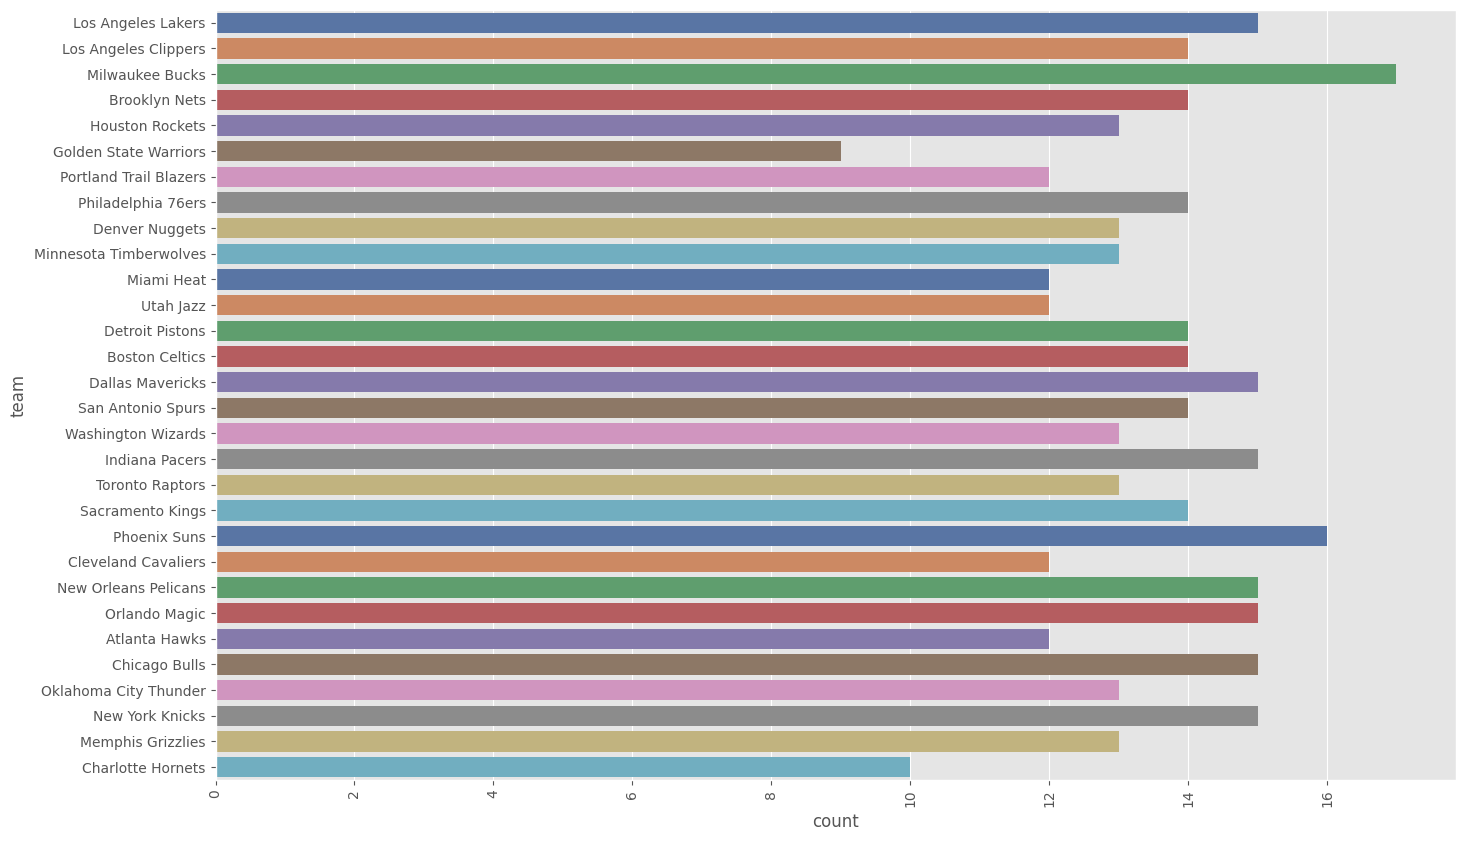

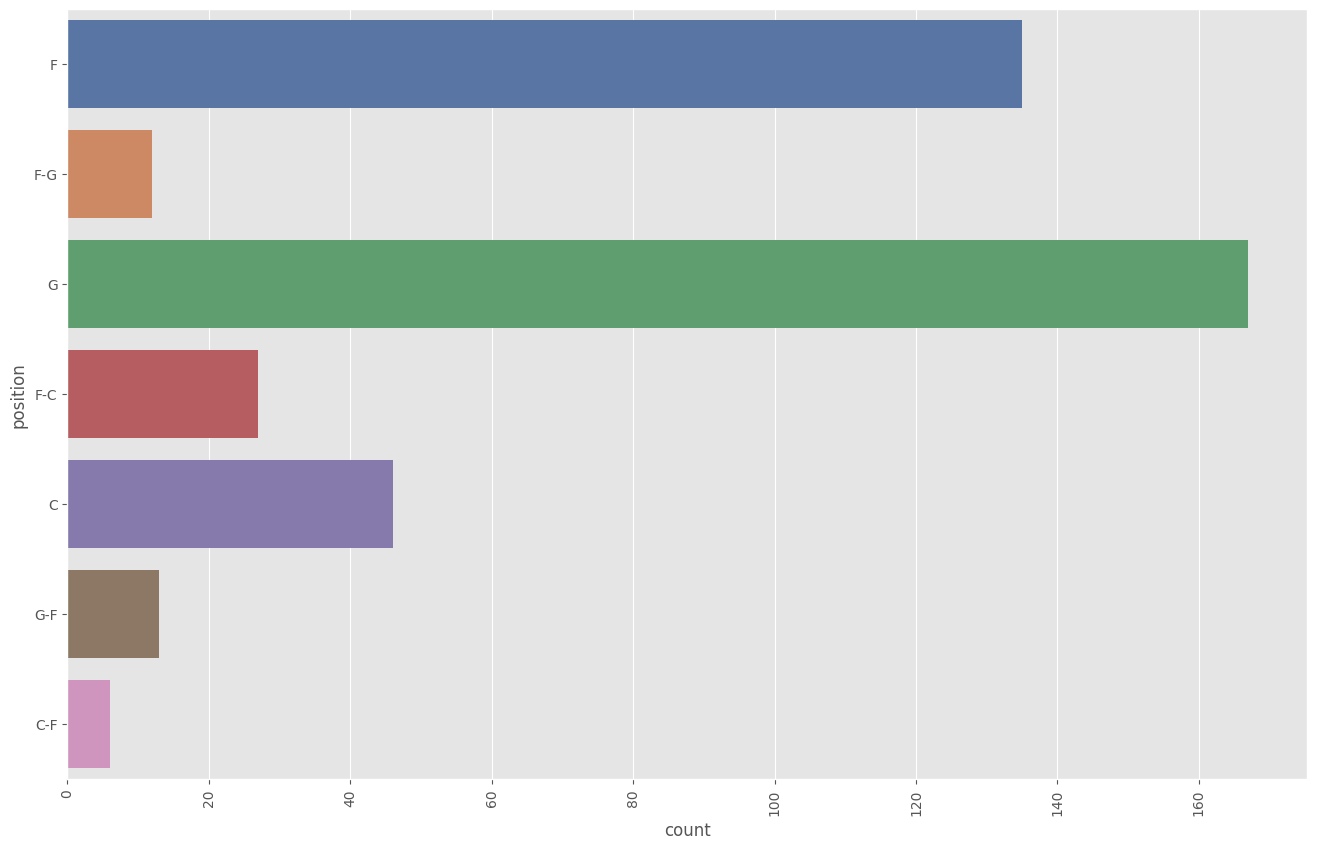

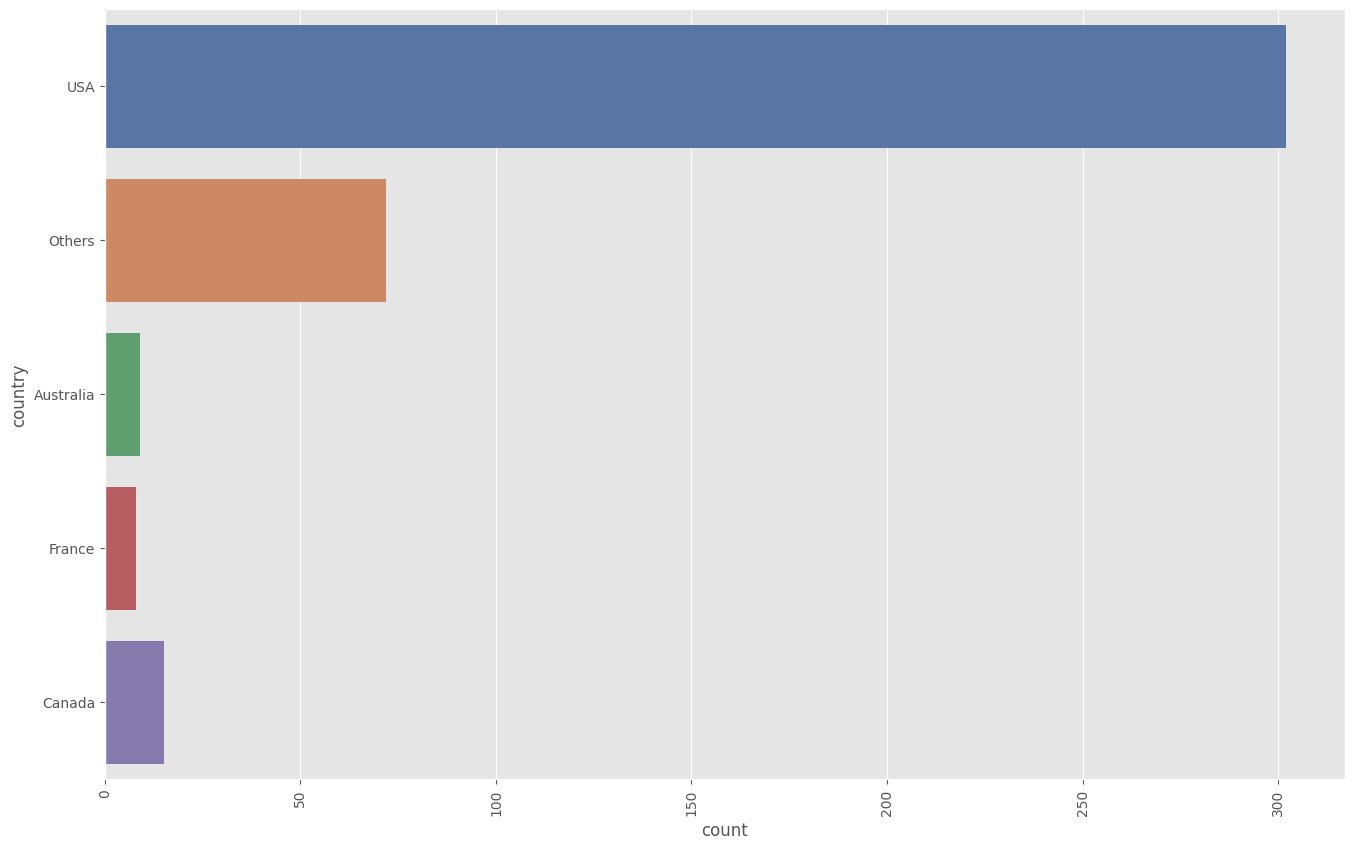

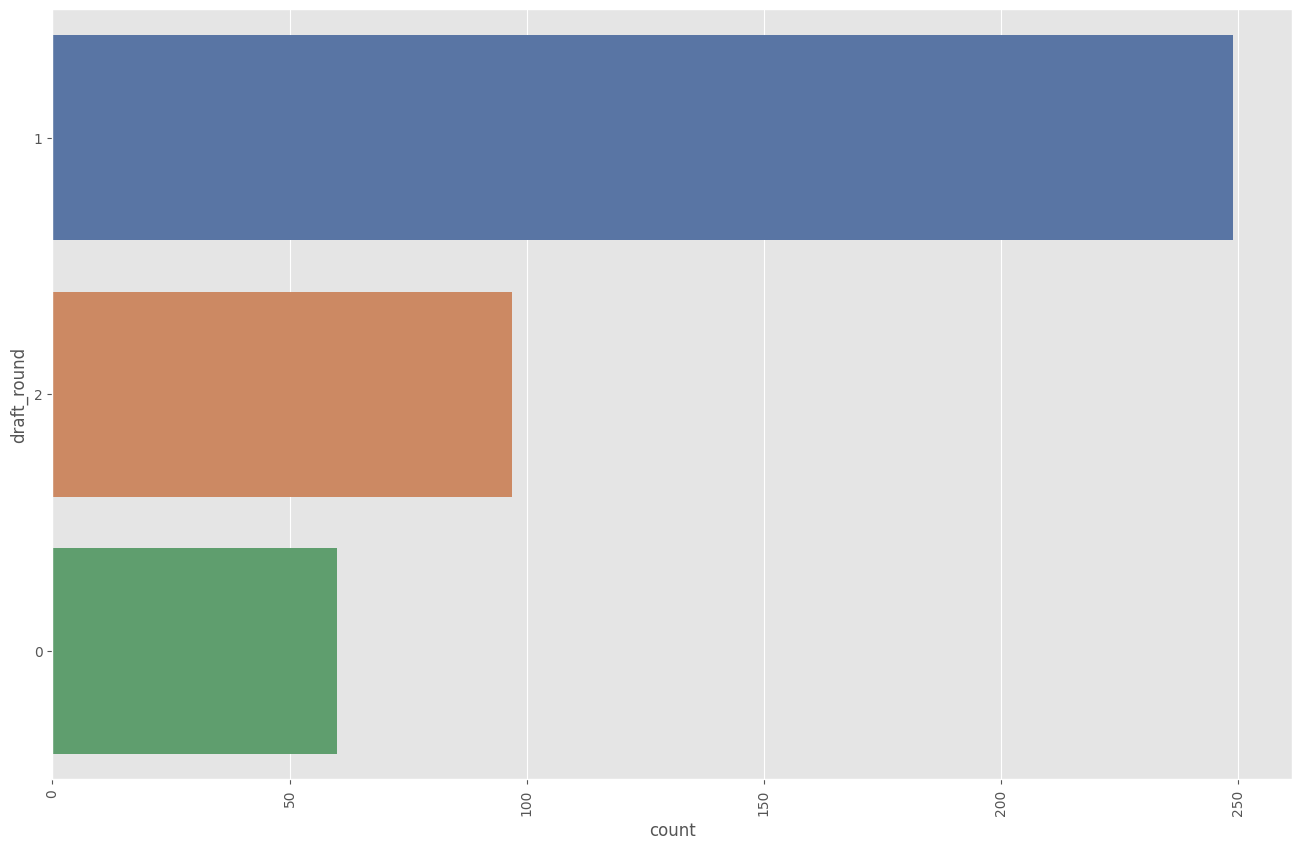

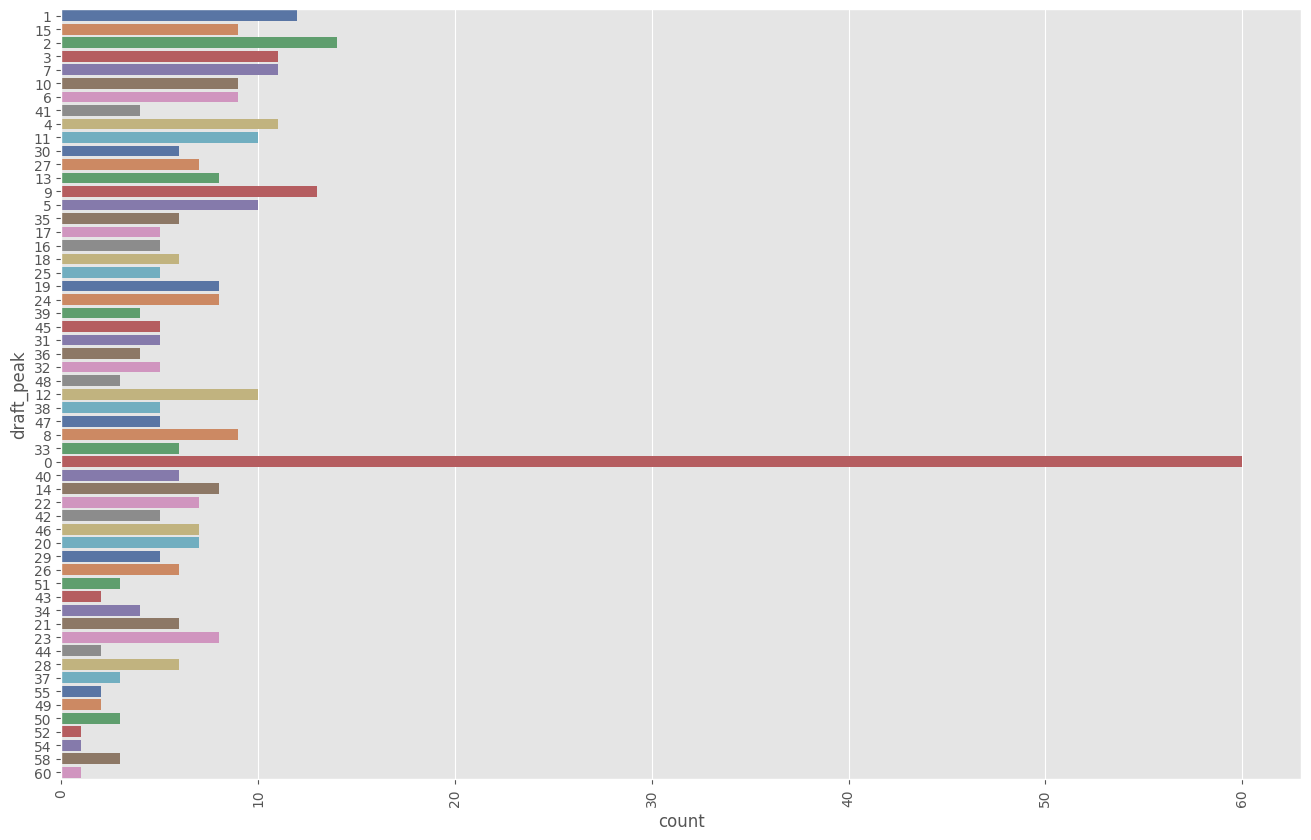

In [468]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')
    plt.figure(figsize = (16,10))
    ax = sns.countplot(df[col],palette='deep')
    plt.xticks(rotation=90)
    plt.show

- - Verifie outliers

<Axes: xlabel='salary'>

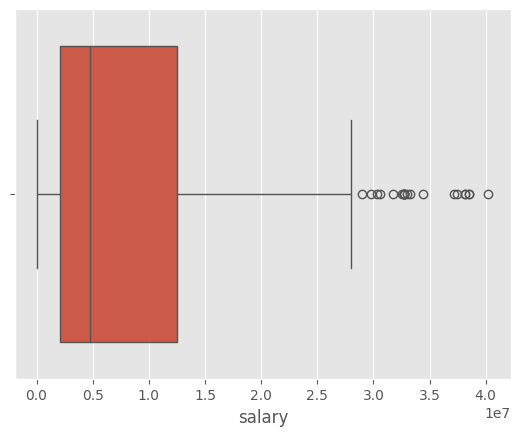

In [469]:
sns.boxplot(x=df['salary'])  

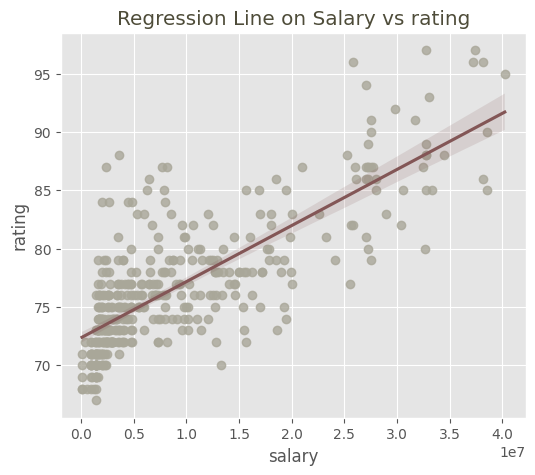

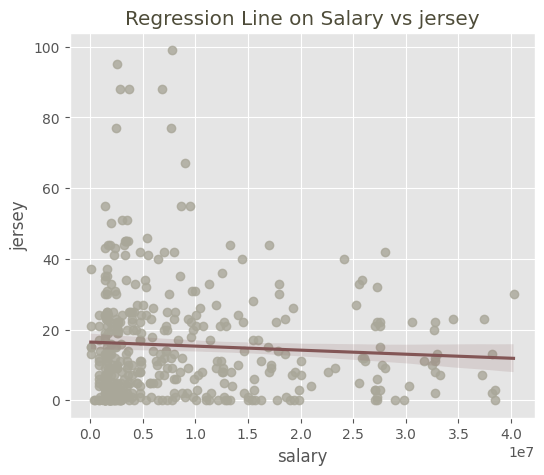

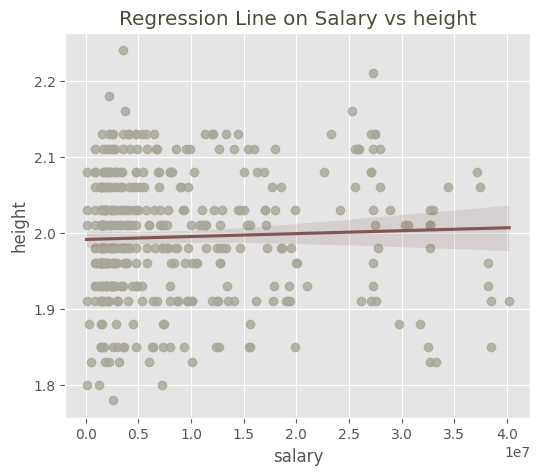

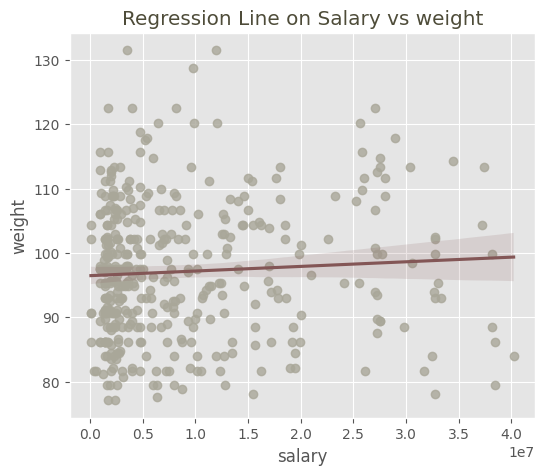

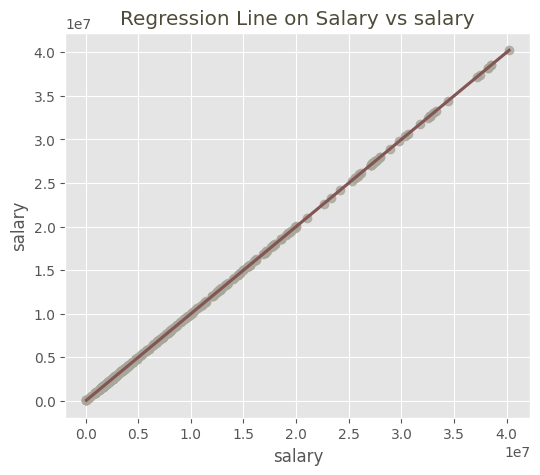

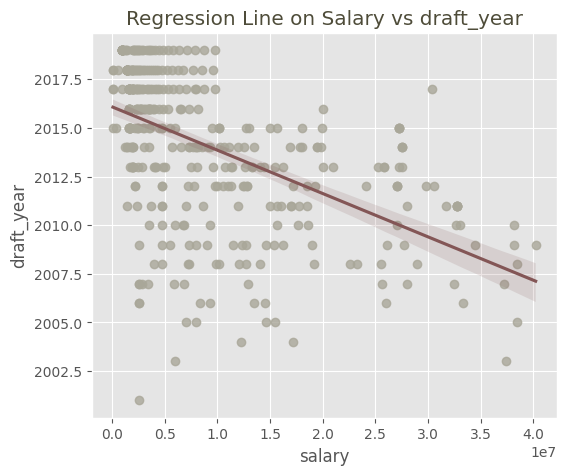

In [470]:
for col in df.select_dtypes(include=['int','float']):
    plt.figure(figsize=(6,5))
    ax = sns.regplot(x="salary", y=col, data=df, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
    ax.set_title("Regression Line on Salary vs " + col , color="#4e4c39")
    plt.show(ax)

# [Step 4: Feature Relationships]()<a id="5"></a> <br>

- - Relation variables/variables : (Taux de corre variables/variables>0.9)

<Axes: >

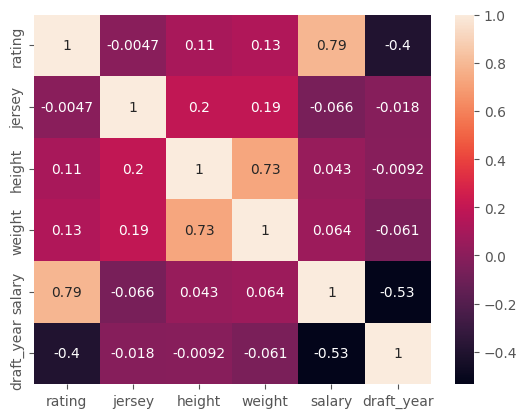

In [471]:
cols = list()
numeric_cols = df.select_dtypes(exclude='object').columns
df_corr = df[numeric_cols].dropna().corr()
sns.heatmap(df_corr, annot=True )

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


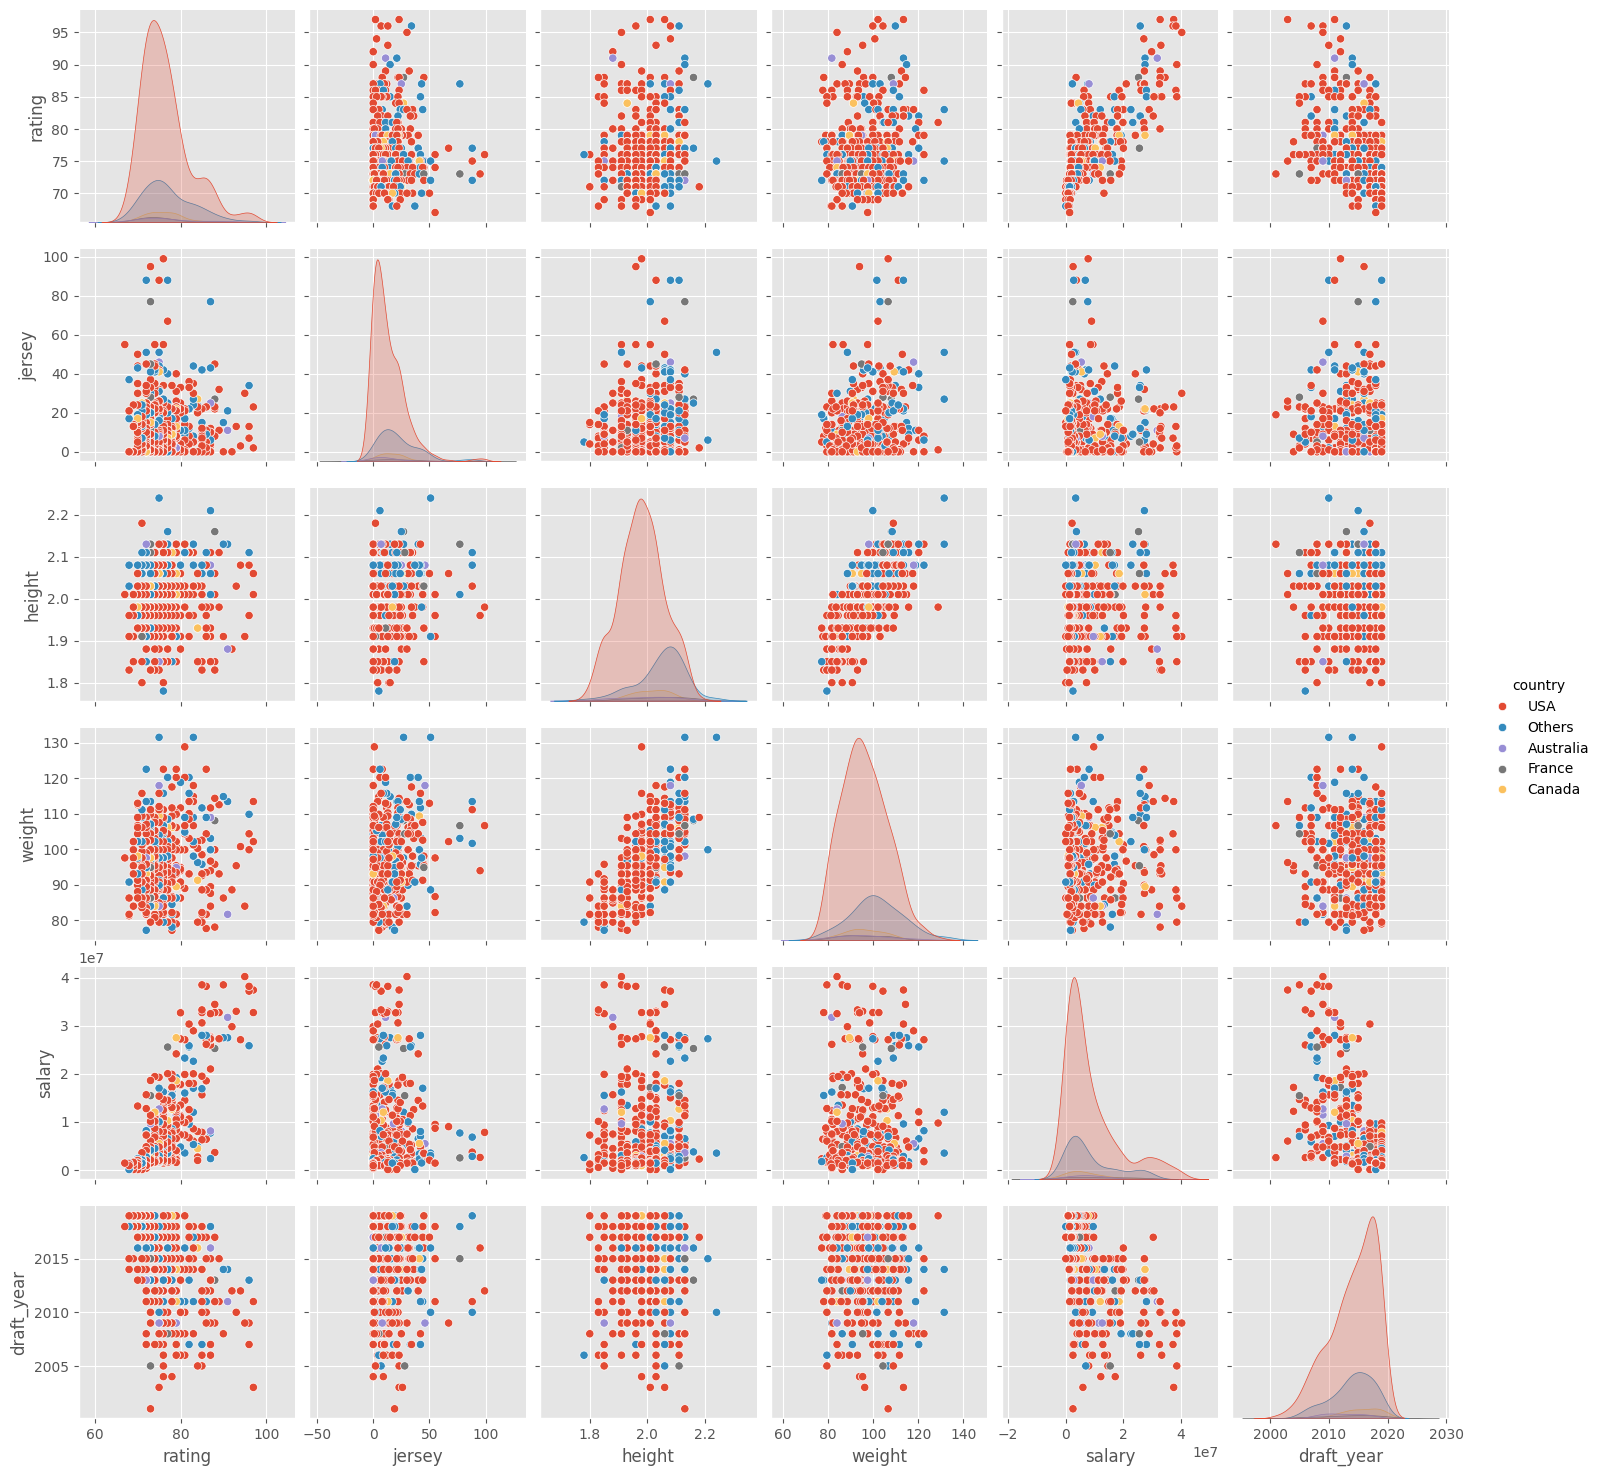

In [472]:
sns.pairplot(df, hue='country')
plt.show()

- - Relation Target/Variables : (Taux corr variables/target >0.9) We ll try to understand how the target and other types variables relate.. 

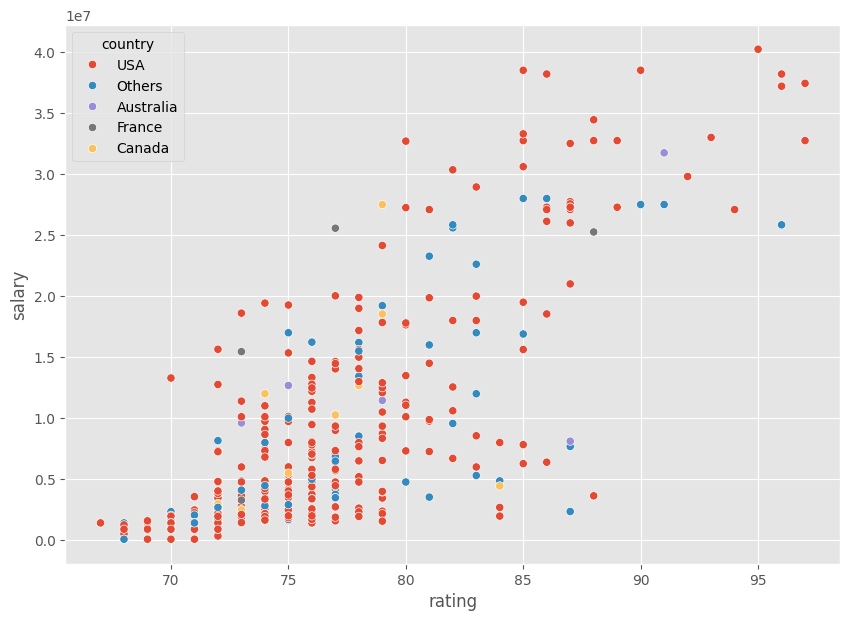

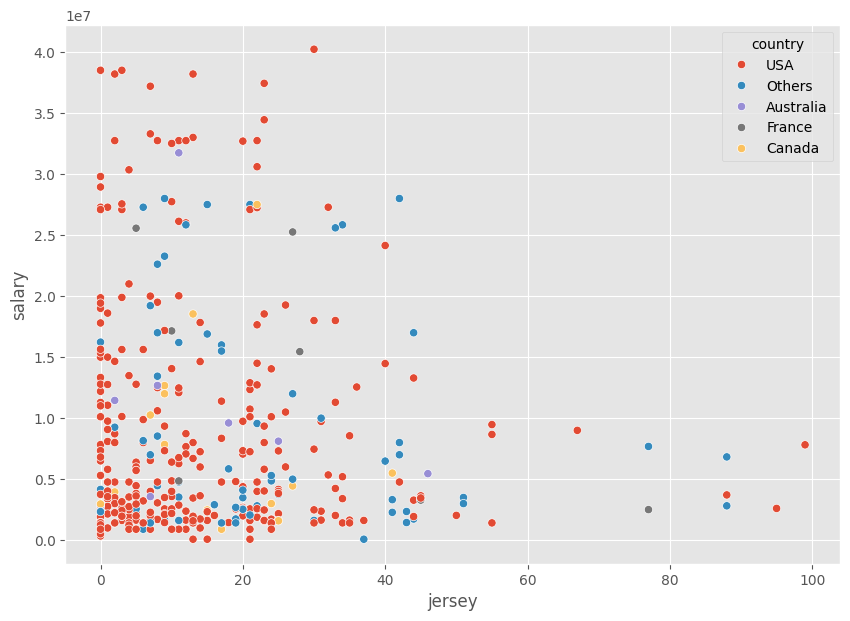

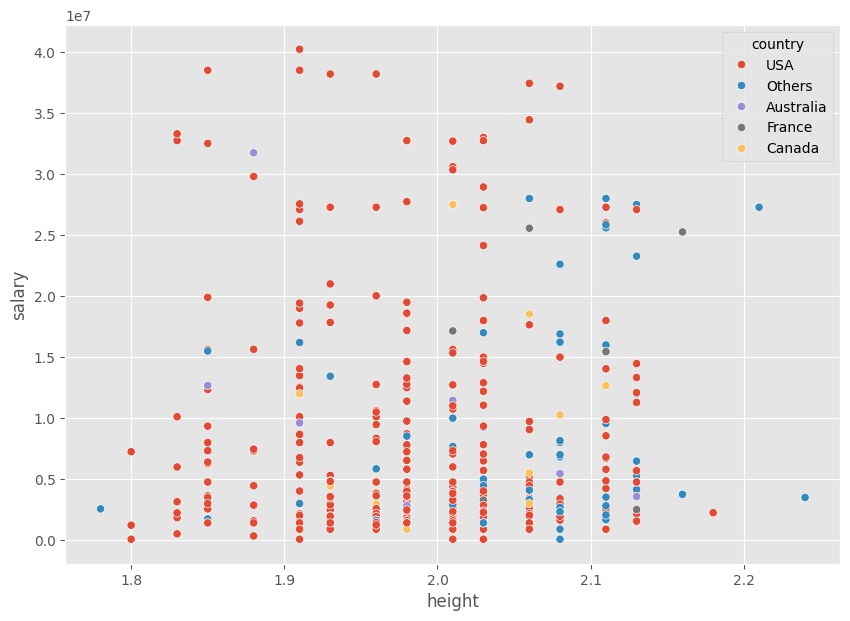

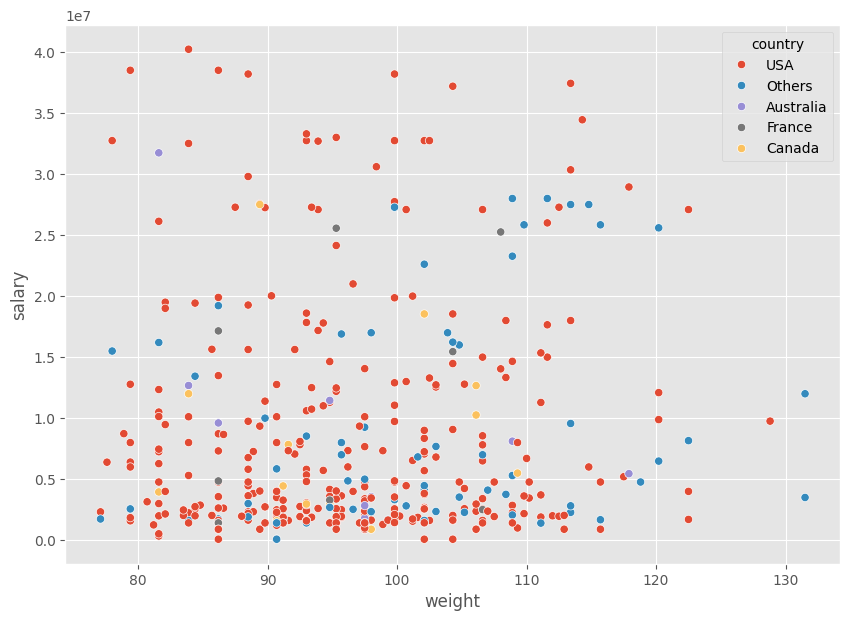

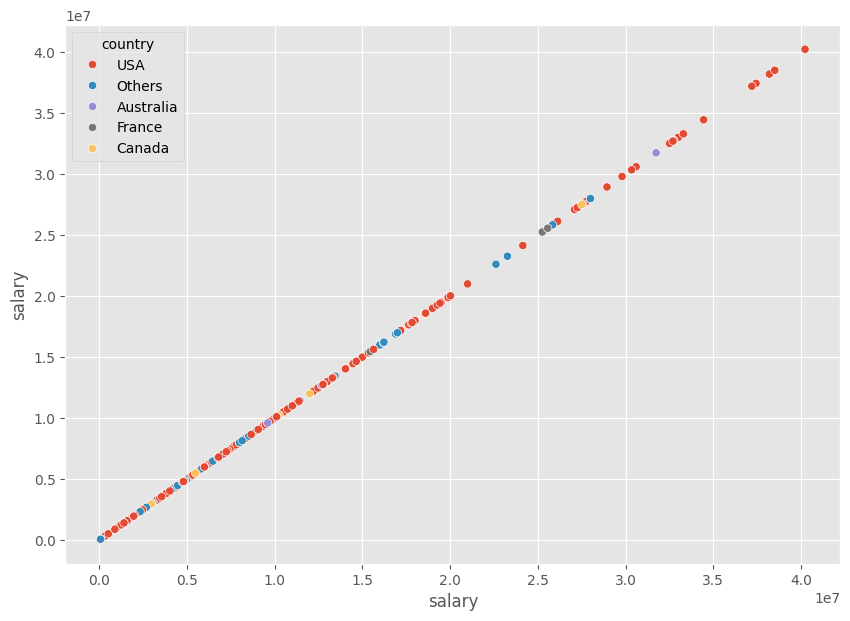

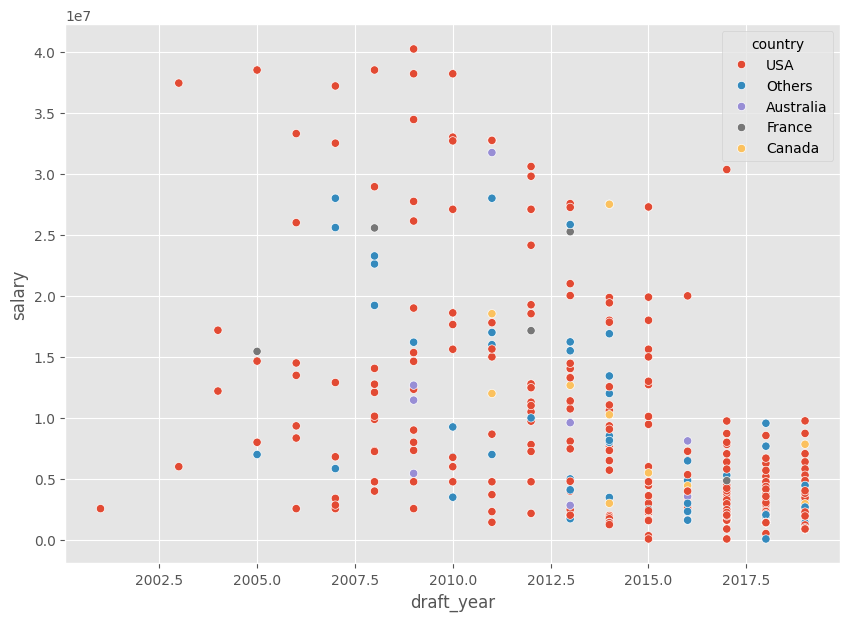

In [473]:
for col in df.select_dtypes(include=['float64','int']):  
    plt.figure(figsize=(10,7))
    sns.scatterplot(x=col, y='salary',hue=df['country'], data=df)
    plt.show()

- - Relation Column/Column : (very usefull)

C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_20300\184028298.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df[col2]==cat][col],kde=True,label=cat)
C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_20300\184028298.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df[col2]==

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

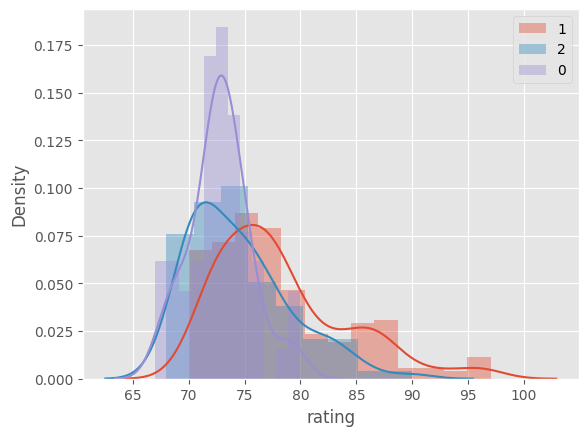

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

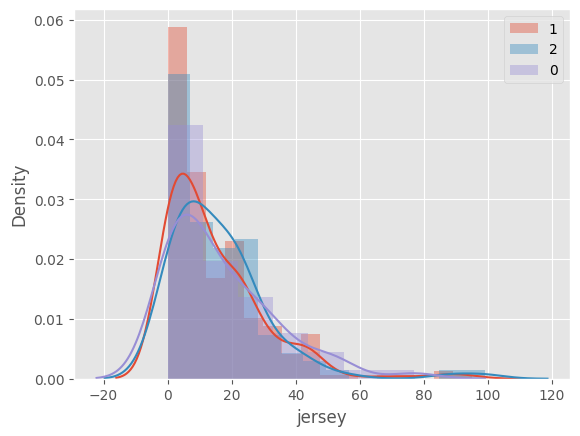

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

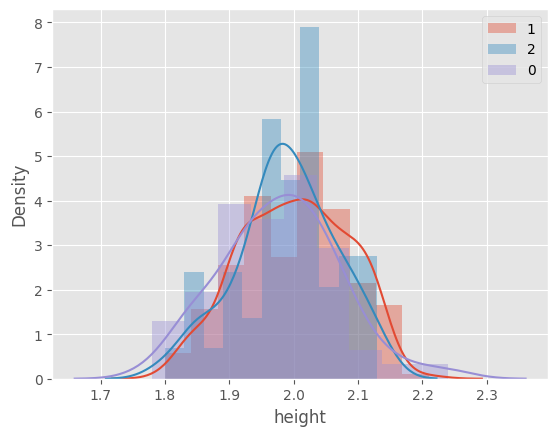

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

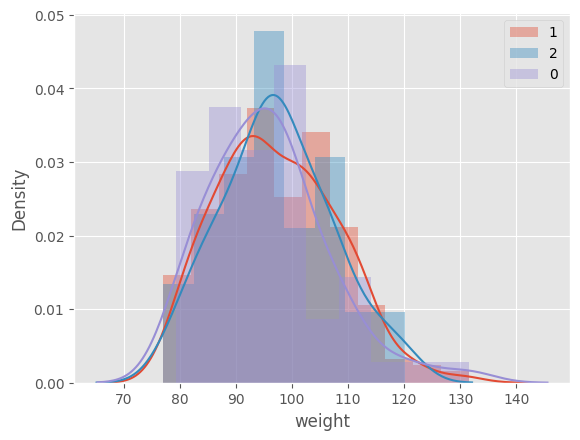

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

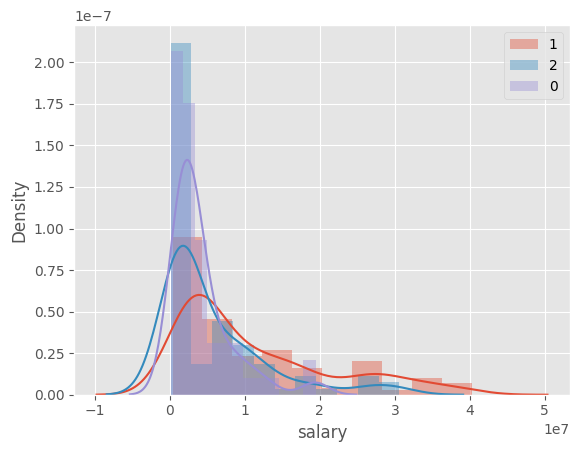

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

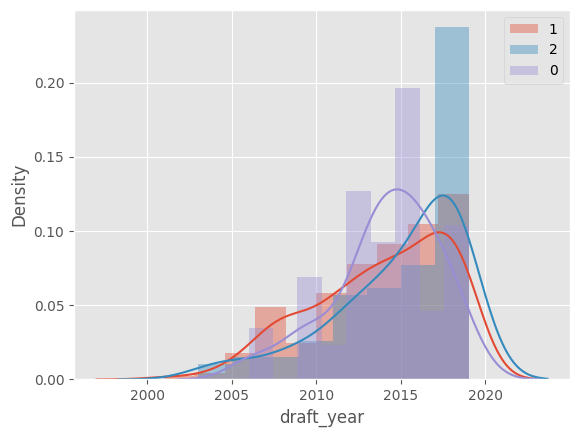

<Figure size 640x480 with 0 Axes>

In [474]:
for col in df.select_dtypes(include=['float','int']):           
    for col2 in df.select_dtypes(include=['object']):
        plt.figure() 
        if len(df[col2].unique()) <4 :
            for cat in df[col2].unique():
                #Data_A=Data[Data['column_y']==A]
                sns.distplot(df[df[col2]==cat][col],kde=True,label=cat)
            plt.legend()

# [Step 6 : Data Cleaning]()<a id="7"></a> <br>

- Encodage : (Only for object column)

In [475]:
df.head(5)

,rating,jersey,team,position,height,weight,salary,country,draft_year,draft_round,draft_peak
0,97,23,Los Angeles Lakers,F,2.06,113.4,37436858,USA,2003,1,1
1,97,2,Los Angeles Clippers,F,2.01,102.1,32742000,USA,2011,1,15
2,96,34,Milwaukee Bucks,F-G,2.11,109.8,25842697,Others,2013,1,15
3,96,7,Brooklyn Nets,F,2.08,104.3,37199000,USA,2007,1,2
4,96,13,Houston Rockets,G,1.96,99.8,38199000,USA,2009,1,3


In [476]:
from sklearn.preprocessing import LabelEncoder
def encodage(data):
    cod_dict = {}
    for col in data.select_dtypes('object'):
        cod_dict[col] = LabelEncoder()
        print(cod_dict.keys())
        data[col] = cod_dict[col].fit_transform(data[col])
    return data

- - Train_test_split

([<matplotlib.patches.Wedge at 0x15213e94820>,
 [Text(-0.8858991950521192, 0.652060285714448, 'Data_train'),
  Text(0.8858991645269729, -0.6520603271863821, 'Data_test')],
 [Text(-0.4832177427557013, 0.3556692467533352, '79.8%'),
  Text(0.4832177261056215, -0.3556692693743902, '20.2%')])

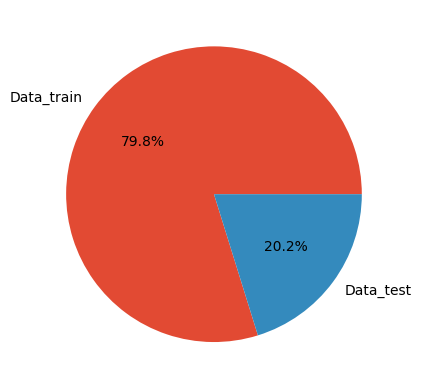

In [477]:
from sklearn.model_selection import train_test_split
Data_train , Data_test = train_test_split(df, test_size=0.2, random_state=0)
#chek if train_size==1-0.2 of all rows
plt.pie((Data_train.shape[0],Data_test.shape[0]), labels=('Data_train', 'Data_test'), autopct='%1.1f%%')

In [478]:
from sklearn.preprocessing import StandardScaler
def prep(data):
    # only for column object use it
    data = encodage(data)
    # alwayse use it
    X = data.drop('salary',axis=1)
    y = data['salary']
    # only for target regression
    sc = StandardScaler()
    X = sc.fit_transform(X)
    return X,y

In [479]:
df.columns

Index(['rating', 'jersey', 'team', 'position', 'height', 'weight', 'salary',
       'country', 'draft_year', 'draft_round', 'draft_peak'],
      dtype='object')

In [480]:
df['draft_round'].unique()

array(['1', '2', '0'], dtype=object)

In [481]:
X_train, y_train = prep(Data_train)
X_test, y_test = prep(Data_test)

dict_keys(['team'])
dict_keys(['team', 'position'])
dict_keys(['team', 'position', 'country'])
dict_keys(['team', 'position', 'country', 'draft_round'])
dict_keys(['team', 'position', 'country', 'draft_round', 'draft_peak'])
dict_keys(['team'])
dict_keys(['team', 'position'])
dict_keys(['team', 'position', 'country'])
dict_keys(['team', 'position', 'country', 'draft_round'])
dict_keys(['team', 'position', 'country', 'draft_round', 'draft_peak'])


# [Step 7: Model Building (If Applicable):]()<a id="8"></a> <br>

- Train the model

In [482]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# [Step 8: Model Evaluation:]()<a id="9"></a> <br>
- Evaluate the model's performance on the testing set using relevant metrics.

In [483]:
score = model.score(X_test,y_test)
print(score)
y_pred = model.predict(X_test)

0.6661283426704603


accuracy_score :  0.6661283426704603
MAE :  4577130.10209575
MSE :  41962463580252.09
RMSE :  6477844.053406357
MAE2 :  2794123.57464254


C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_20300\662181280.py:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred)


<Axes: xlabel='salary', ylabel='Density'>

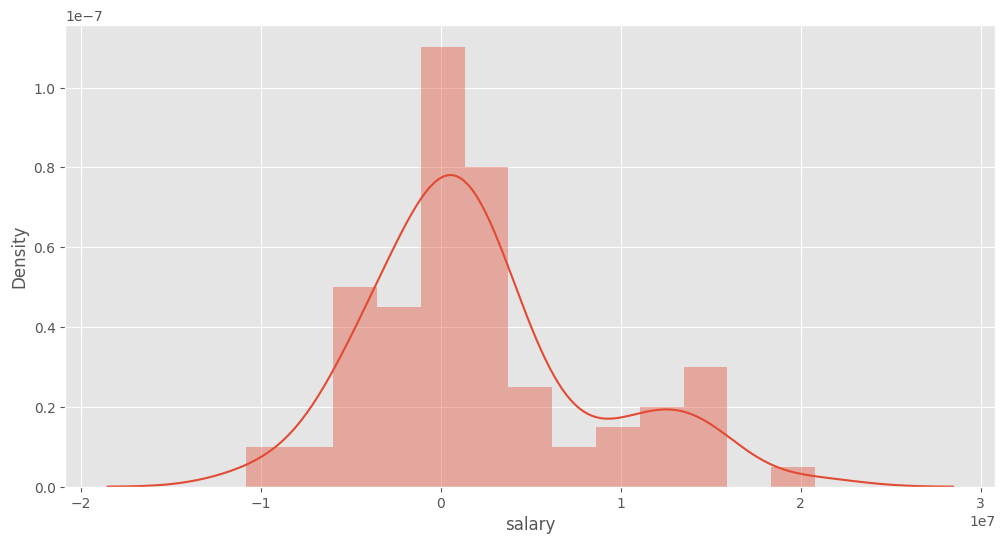

In [484]:
from sklearn.metrics import accuracy_score, mean_absolute_error,mean_squared_error,median_absolute_error

def scoring(y_test,y_pred):
    # Coefficient of Determination : R2= -((y-y_pred)**2/(y-y_mean)**2)   #this model describe in % the variation of y
    acc=model.score(X_test,y_test)        

    # Metrics.mean_absolute_error : 1/m(y-y_pred)  #is to detecte the big & catastrophic linéaire Error 
    MAE = mean_absolute_error(y_test, y_pred)        

    # Metrics.mean_squared_error: 1/m(y-y_pred)**2  #is to detecte the big & catastrophic exponentiell Error 
    MSE = mean_squared_error(y_test,y_pred)

    # Metrics.root.mean_squared_error: sqrt(1/m(y-y_pred)**2)  #is to detecte the big & catastrophic exponentiell Error 
    RMSE = np.sqrt(mean_squared_error(y_test,y_pred))

    # Metrics.median_absolute_error : Median(y-y_pred)  #used to elimine aberant values
    MAE2 = median_absolute_error(y_test,y_pred)          

    return acc,MAE,MSE,RMSE,MAE2

#compare (accuracy acc, MAS,MSE,MAE)
scoring(y_test,y_pred)      
print("accuracy_score : " , scoring(y_test,y_pred)[0])
print("MAE : ",  scoring(y_test,y_pred)[1] )
print("MSE : " , scoring(y_test,y_pred)[2] )
print("RMSE : " , scoring(y_test,y_pred)[3] )
print("MAE2 : " , scoring(y_test,y_pred)[4] )
# Performance of model : #visuel how many ele have errors & if it's normal statistiq
plt.figure(figsize = (12,6))
sns.distplot(y_test - y_pred)    